
# Table of Contents
<a id="toc"></a>
- [1. Data Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Data Cleaning](#3)
    - [3.1 Detect the Face](#3.1)
    - [3.2 Detect Two Eyes](#3.2)
    - [3.3 Generate New Images](#3.3)
- [4. Feature Engineering](#4)
    - [4.1 Wavelet Transformation](#4.1)
- [5. Resize and Assign X and y](#5)
- [6. Feature Scaling](#6)
- [7. Spliting the data into Training and Testing Data](#7)
- [8. Hyperparamter Tuning](#8)
- [9. Machine Learning Modeling](#9)
    - [9.1 SVM Model](#9.1)
        - [9.1.1 Cross Validation](#9.1.1)
        - [9.1.2 Accuarcy of the model](#9.1.2)
        - [9.1.3 Confusion Matrix](#9.1.3)
        - [9.1.4 Classification Report](#9.1.4)
    - [9.2 Logistic Regression Model](#9.2)
        - [9.2.1 Cross Validation](#9.2.1)
        - [9.2.2 Accuarcy of the model](#9.2.2)
        - [9.2.3 Confusion Matrix](#9.2.3)
        - [9.2.4 Classification Report](#9.2.4)
    - [9.3 Random Forest Model](#9.3)
        - [9.3.1 Cross Validation](#9.3.1)
        - [9.3.2 Accuarcy of the model](#9.3.2)
        - [9.3.3 Confusion Matrix](#9.3.3)
        - [9.3.4 Classification Report](#9.3.4)
    - [9.4 Decision Tree Model](#9.4)
        - [9.4.1 Cross Validation](#9.4.1)
        - [9.4.2 Accuarcy of the model](#9.4.2)
        - [9.4.3 Confusion Matrix](#9.4.3)
        - [9.4.4 Classification Report](#9.4.4)
    - [9.5 Bagging](#9.5)
        - [9.5.1 Cross Validation](#9.5.1)
        - [9.5.2 Accuarcy of the model](#9.5.2)
        - [9.5.3 Confusion Matrix](#9.5.3)
        - [9.5.4 Classification Report](#9.5.4)
    - [9.6 Boosting](#9.6)
        - [9.6.1 Cross Validation](#9.6.1)
        - [9.6.2 Accuarcy of the model](#9.6.2)
        - [9.6.3 Confusion Matrix](#9.6.3)
        - [9.6.4 Classification Report](#9.6.4)
    - [9.7 KNN](#9.7)
        - [9.7.1 Cross Validation](#9.7.1)
        - [9.7.2 Accuarcy of the model](#9.7.2)
        - [9.7.3 Confusion Matrix](#9.7.3)
        - [9.7.4 Classification Report](#9.7.4)

<a id='1'></a>
# Data Description

***The data contains 5 Bayern Munich players and each player has about 100 random images collected from Google <br>
so our data have 5 classes:***
 - Kingsley Coman
 - Joshua Kimmich
 - Robert Lewandowski
 - Manuel Neuer
 - Leory Sane<br><br>

***Kingsley Coman Class 0***
<img src = 'Data/Coman/kingsley_coman.png' width=800, hight=800>
***Joshua Kimmich Class 1***
<img src = 'Data/Joshua Kimmich/Joshua Kimmich.jpg' width=400, hight=400>
***Robert Lewandowski Class 2***
<img src = 'Data/Lewandowski/Robert-Lewandowski.png' width=400, hight=400>
***Manuel Neuer Class 3***
<img src = 'Data/Manuel Neuer/Manuel Neuer_ News & player profile... (1).png' width=800, hight=800>
***Leory Sane Class 4***
<img src = 'Data/Sane/FC Bayern Munich.png' width=800, hight=800>

<a id='2'></a>
# Import Necessaries Libraries

In [156]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

import os
import shutil
import warnings
import pywt

from sklearn.preprocessing import StandardScaler, robust_scale, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical


from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# Data Cleaning


In [14]:
img = cv.imread('test_images/neueer.jpg') #read a random image
img.shape

(707, 1060, 3)

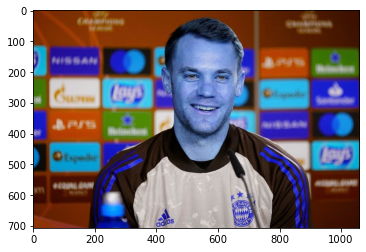

In [15]:
plt.imshow(img) #show the image
plt.show()

In [16]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert the image to gray scale
gray.shape

(707, 1060)

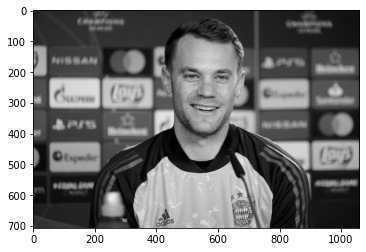

In [17]:
plt.imshow(gray, cmap='gray'); # show the gray image

In [18]:
# reading the cascades
face_cascade = cv.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5) # detecting the face

In [19]:
# face cordinates
(x,y,w,h) = faces[0]
(x,y,w,h)

(439, 119, 250, 250)

<a id ='3.1'></a>
**Detect the Face**

In [20]:
face_img = cv.rectangle(img, (x,y), (x+w, y+h), (255,0,0),5) # draw rectangle on the face

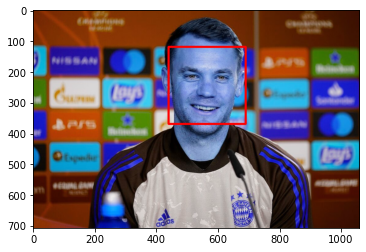

In [21]:
plt.imshow(face_img) # plotting the detected face

In [22]:
cv.destroyAllWindows()

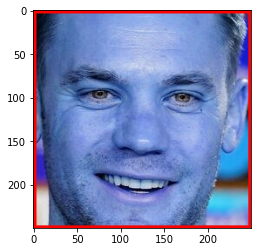

In [23]:
plt.imshow(face_img[y:y+h, x:x+w]) #plotting the cropped face

<a id ='3.2'></a>
**Detect Two Eyes**

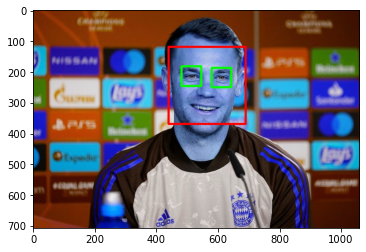

In [24]:
# function to detect the face and two eyes
for (x,y,w,h) in faces:
    face_img = cv.rectangle(img, (x,y), (x+w, y+h), (255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color,  (ex,ey), (ex+ew, ey+eh), (0,255,0),5)

plt.imshow(face_img)

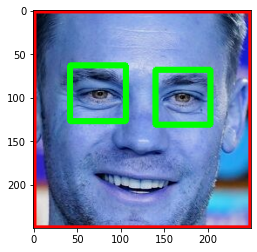

In [25]:
plt.imshow(roi_color) # plotting the face with eyes detected

In [26]:
# a function to detect the face and two eyes then crop the face
def get_cropped_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h )in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:  
            return roi_color

In [27]:
# read random image to test the function
cropped_image = get_cropped_2_eyes('Data/Lewandowski/Lethal_ Lewandowski deserves Ballon d....jpg') 

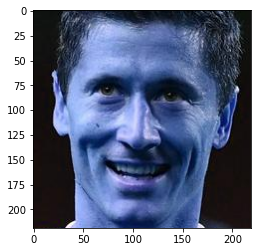

In [28]:
plt.imshow(cropped_image); # show cropped image and it the function works

In [29]:
cropped_image2 = get_cropped_2_eyes('test_images/3.jpg') # read an image without cleared 2 eyes

In [30]:
cropped_image2 # it shows nothing

that's good for data cleaning as The two eyes must be clear to the model

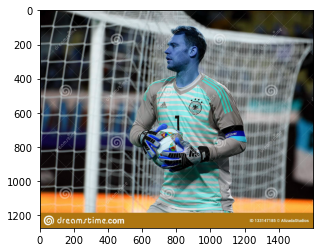

In [31]:
# the original image
original_image = cv.imread('test_images/3.jpg')
plt.imshow(original_image);

In [32]:
# our data paths
path_to_data = "Data/"
path_to_cropped_data = "data_cropped/"

In [33]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [34]:
img_dirs

['Data/Coman',
 'Data/Joshua Kimmich',
 'Data/Lewandowski',
 'Data/Manuel Neuer',
 'Data/Sane']

In [35]:
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)

In [36]:
os.mkdir(path_to_cropped_data)

<a id='3.3'></a>
**Generate New Images**

In [37]:
# this will go through all the images and detect the face and 2 eyes and crop the face then save the cropped images into another folder
cropped_img_dirs = []
player_file_name = {}
for img_dir in img_dirs:
    count=1
    player_name = img_dir.split('/')[-1]
    player_file_name[player_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data  + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv.imwrite(cropped_file_path, roi_color)
            player_file_name[player_name].append(cropped_file_path)
            count+=1

Generating cropped images in folder:  data_cropped/Coman
Generating cropped images in folder:  data_cropped/Joshua Kimmich
Generating cropped images in folder:  data_cropped/Lewandowski
Generating cropped images in folder:  data_cropped/Manuel Neuer
Generating cropped images in folder:  data_cropped/Sane


after that delete the outliers manually

In [38]:
player_file_name = {}
for img_dir in cropped_img_dirs:
    player_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    player_file_name[player_name] = file_list
player_file_name

{'Coman': ['data_cropped/Coman\\Coman1.png',
  'data_cropped/Coman\\Coman11.png',
  'data_cropped/Coman\\Coman14.png',
  'data_cropped/Coman\\Coman15.png',
  'data_cropped/Coman\\Coman16.png',
  'data_cropped/Coman\\Coman17.png',
  'data_cropped/Coman\\Coman18.png',
  'data_cropped/Coman\\Coman19.png',
  'data_cropped/Coman\\Coman2.png',
  'data_cropped/Coman\\Coman22.png',
  'data_cropped/Coman\\Coman23.png',
  'data_cropped/Coman\\Coman24.png',
  'data_cropped/Coman\\Coman25.png',
  'data_cropped/Coman\\Coman27.png',
  'data_cropped/Coman\\Coman28.png',
  'data_cropped/Coman\\Coman29.png',
  'data_cropped/Coman\\Coman3.png',
  'data_cropped/Coman\\Coman30.png',
  'data_cropped/Coman\\Coman31.png',
  'data_cropped/Coman\\Coman32.png',
  'data_cropped/Coman\\Coman33.png',
  'data_cropped/Coman\\Coman34.png',
  'data_cropped/Coman\\Coman35.png',
  'data_cropped/Coman\\Coman36.png',
  'data_cropped/Coman\\Coman37.png',
  'data_cropped/Coman\\Coman38.png',
  'data_cropped/Coman\\Coman4.pn

<a id='4'></a>
# Feature Engineering

this is very important for the computer because it show a lot of feature the area of eye differentiated from the area of the forehead...etc this kind of details is very important for the computer

In [39]:
def wavelet_transformation(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [40]:
cropped_image

array([[[14, 18, 13],
        [15, 19, 14],
        [15, 19, 14],
        ...,
        [15, 19, 14],
        [15, 16, 14],
        [15, 16, 14]],

       [[14, 18, 13],
        [15, 19, 14],
        [15, 19, 14],
        ...,
        [15, 19, 14],
        [15, 16, 14],
        [15, 16, 14]],

       [[16, 19, 17],
        [15, 18, 16],
        [15, 18, 16],
        ...,
        [14, 18, 13],
        [16, 17, 15],
        [16, 17, 15]],

       ...,

       [[26, 16, 16],
        [28, 16, 16],
        [28, 15, 17],
        ...,
        [28, 16, 16],
        [26, 16, 16],
        [26, 16, 16]],

       [[26, 17, 14],
        [28, 16, 14],
        [28, 16, 14],
        ...,
        [28, 16, 16],
        [26, 16, 16],
        [26, 16, 16]],

       [[26, 17, 13],
        [26, 18, 11],
        [24, 17,  8],
        ...,
        [30, 18, 16],
        [26, 16, 16],
        [26, 16, 16]]], dtype=uint8)

In [41]:
img_har = wavelet_transformation(cropped_image, 'db1', 5)

<a id='4.1'></a>
**Wavelet Transformation**

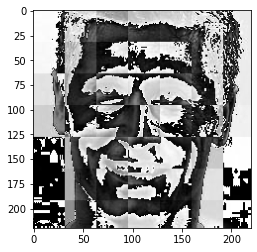

In [42]:
plt.imshow(img_har, cmap='gray');

this image is very important for the computer because it show a lot of feature the area of eye differentiated from the area of the forehead...etc this kind of details is very important for the computer

In [43]:
class_dict = {}
count = 0

for player_name in player_file_name.keys():
    class_dict[player_name] = count
    count += 1
    
class_dict

{'Coman': 0,
 'Joshua Kimmich': 1,
 'Lewandowski': 2,
 'Manuel Neuer': 3,
 'Sane': 4}

<a id='5'></a>
# Resize and Assign X and y

In [210]:
X, y = [], []
for player_name, training_files in player_file_name.items():
    for training_image in training_files:
        img = cv.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv.resize(img, (32, 32))
        img_har = wavelet_transformation(img,'db1',5)
        scalled_img_har = cv.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player_name])

In [211]:
len(X)

230

In [212]:
len(X[0])

4096

In [213]:
X

[array([[170],
        [143],
        [139],
        ...,
        [ 12],
        [199],
        [214]], dtype=uint8),
 array([[ 20],
        [ 21],
        [ 17],
        ...,
        [238],
        [235],
        [ 16]], dtype=uint8),
 array([[18],
        [11],
        [ 9],
        ...,
        [ 8],
        [ 0],
        [ 0]], dtype=uint8),
 array([[ 47],
        [ 51],
        [ 48],
        ...,
        [102],
        [102],
        [102]], dtype=uint8),
 array([[255],
        [255],
        [255],
        ...,
        [178],
        [  0],
        [  0]], dtype=uint8),
 array([[ 46],
        [ 43],
        [ 40],
        ...,
        [128],
        [135],
        [131]], dtype=uint8),
 array([[125],
        [127],
        [131],
        ...,
        [229],
        [235],
        [241]], dtype=uint8),
 array([[197],
        [197],
        [185],
        ...,
        [  8],
        [  5],
        [ 38]], dtype=uint8),
 array([[150],
        [123],
        [119],
        ...,
    

In [214]:
X[0].shape

(4096, 1)

In [215]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(230, 4096)

In [216]:
X[0].shape

(4096,)

In [217]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [218]:
X.shape

(230, 4096)

In [219]:
len(y)

230

<a id='6'></a>
# Feature Scaling

In [220]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [221]:
X_scale

array([[ 1.57752272,  1.10733636,  0.82935446, ..., -0.90962234,
         1.09738526,  1.20914643],
       [-0.80002889, -0.83526185, -1.0645002 , ...,  1.36980538,
         1.46464406, -0.76258446],
       [-0.83172958, -0.99449121, -1.18868739, ..., -0.94996619,
        -0.93273977, -0.92191624],
       ...,
       [-1.06948474, -1.13779763, -1.31287459, ..., -0.93988023,
        -0.87152997, -0.8820833 ],
       [-0.92683164, -0.96264533, -1.0645002 , ..., -1.0306539 ,
        -0.93273977, -0.92191624],
       [ 0.83255655,  0.97995287,  0.92249485, ..., -0.96005216,
         1.09738526, -0.91195801]])

In [222]:
X_scale.shape

(230, 4096)

In [223]:
X_scale.dtype

dtype('float64')

<a id='7'></a>
# Spliting the data into Training and Testing Data

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.3, random_state=60)

<a id='8'></a>
# Hyperparameter Tuning

In [104]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [100, 10, 1.0, 0.1, 0.001],
            'kernel': ['rbf','linear', 'poly', 'sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'max_features' : np.arange(1,21),
            'max_features' : ['sqrt', 'log2'],
            'n_estimators': [10,100,1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty': ['none', 'l1', 'l2', 'elasticnet'],
            'C' : [100,10,1.0,0.1,0.01]
        }
    },
    'KNN': {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : np.arange(1,22),
            'weights' : ['uniform', 'distance']
        }
    }
}

In [108]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_scale, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.830435,"{'C': 100, 'kernel': 'linear'}"
1,random_forest,0.747826,"{'max_features': 'sqrt', 'n_estimators': 1000}"
2,logistic_regression,0.856522,"{'C': 100, 'penalty': 'l1', 'solver': 'libline..."
3,KNN,0.647826,"{'n_neighbors': 6, 'weights': 'distance'}"


<a id='9'></a>
# Machine Learning Modeling

In [110]:
def kfolds(model, model_name):
    model = cross_val_score(model, X_scale,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

In [111]:
def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True);

def class_report(model):
    y_pred = model.predict(X_test)
    return classification_report(y_test, y_pred)

<a id='9.1'></a>
## SVM Model

<a id='9.1.1'></a>
**Cross Validation**

In [113]:
svm_model = SVC(kernel='linear', gamma='auto', C=100)
kfolds(svm_model, "SVM")

SVM score on cross validation: 85.21739130434783%


<a id='9.1.2'></a>
**Accuarcy of the model**

In [114]:
train(svm_model, "SVM")

SVM model score on Training data: 100.0%
SVM model score on Testing data: 92.7536231884058%


<a id='9.1.3'></a>
**Confusion Matrix**

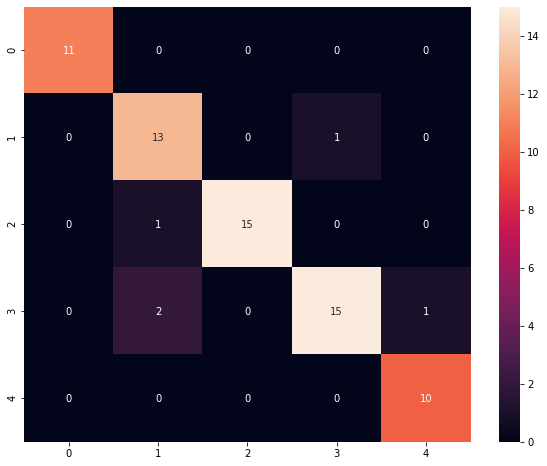

In [115]:
conf_matrix(svm_model)

<a id='9.1.4'></a>
**Classification Report**

In [116]:
print(class_report(svm_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      0.93      0.87        14
           2       1.00      0.94      0.97        16
           3       0.94      0.83      0.88        18
           4       0.91      1.00      0.95        10

    accuracy                           0.93        69
   macro avg       0.93      0.94      0.93        69
weighted avg       0.93      0.93      0.93        69



<a id='9.1'></a>
## Logistic Regression

<a id='9.2.1'></a>
**cross validation**

In [118]:
lr_model = LogisticRegression(C=100, penalty = 'l1', solver='liblinear')
kfolds(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 86.52173913043478%


<a id='9.2.2'></a>
**Accuarcy of the model**

In [119]:
train(lr_model, "Logistic Regression")

Logistic Regression model score on Training data: 100.0%
Logistic Regression model score on Testing data: 84.05797101449275%


<a id='9.2.3'></a>
**confusion matrix**

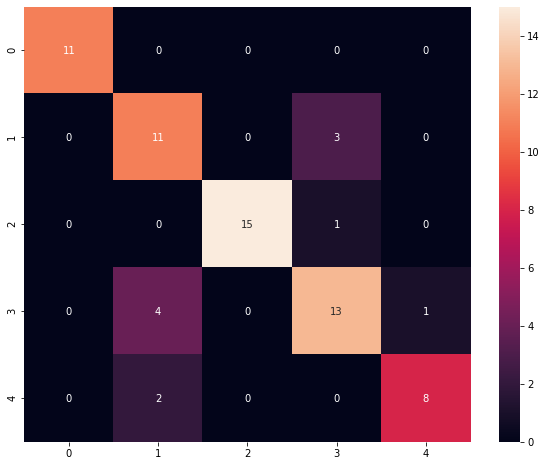

In [120]:
conf_matrix(lr_model);

<a id='9.2.4'></a>
**Classification Report**

In [121]:
print(class_report(lr_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.65      0.79      0.71        14
           2       1.00      0.94      0.97        16
           3       0.76      0.72      0.74        18
           4       0.89      0.80      0.84        10

    accuracy                           0.84        69
   macro avg       0.86      0.85      0.85        69
weighted avg       0.85      0.84      0.84        69



<a id='9.3'></a>
## Random Forest

<a id='9.3.1'></a>
**Cross Validation**

In [123]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=70, max_features='sqrt')
kfolds(rf_model, "Random Forest")

Random Forest score on cross validation: 74.34782608695653%


<a id='9.3.2'></a>
**Accuarcy of the model**

In [124]:
train(rf_model, "Random Forest")

Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 79.71014492753623%


<a id='9.3.3'></a>
**Confusion Matrix**

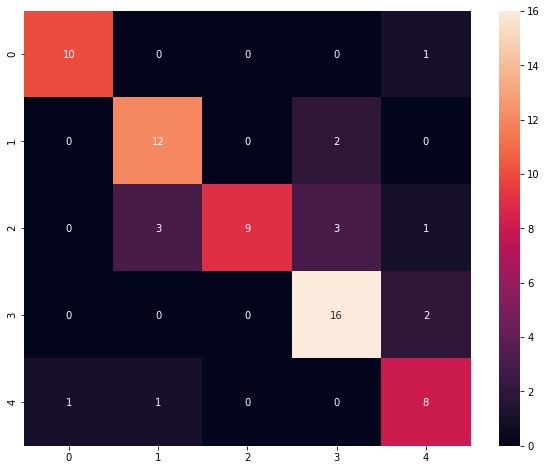

In [125]:
conf_matrix(rf_model)

<a id='9.3.4'></a>
**Classification Report**

In [126]:
print(class_report(rf_model))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.75      0.86      0.80        14
           2       1.00      0.56      0.72        16
           3       0.76      0.89      0.82        18
           4       0.67      0.80      0.73        10

    accuracy                           0.80        69
   macro avg       0.82      0.80      0.80        69
weighted avg       0.82      0.80      0.79        69



<a id='9.4'></a>
## Decision Tree

<a id='9.4.1'></a>
**Cross Validation**

In [134]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")

Decision Tree score on cross validation: 47.39130434782609%


<a id='9.4.2'></a>
**Accuarcy of the model**

In [135]:
train(dt_model, "Decision Tree")

Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 47.82608695652174%


<a id='9.4.3'></a>
**Confusion Matrix**

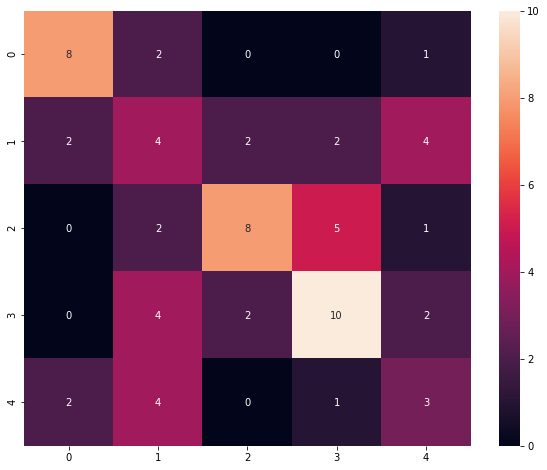

In [136]:
conf_matrix(dt_model);

<a id='9.4.4'></a>
**Classification Report**

In [137]:
print(class_report(dt_model))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.25      0.29      0.27        14
           2       0.67      0.50      0.57        16
           3       0.56      0.56      0.56        18
           4       0.27      0.30      0.29        10

    accuracy                           0.48        69
   macro avg       0.48      0.47      0.48        69
weighted avg       0.50      0.48      0.48        69



<a id='8.5'></a>
## Bagging 

<a id='9.5.1'></a>
**Cross Validation**

In [138]:
bagg_model = BaggingClassifier(n_estimators=150)
kfolds(bagg_model, "Bagging")

Bagging score on cross validation: 73.47826086956522%


<a id='9.5.2'></a>
**Accuarcy of the model**

In [139]:
train(bagg_model, "Bagging")

Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 81.15942028985508%


<a id='9.5.3'></a>
**Confusion Matrix**

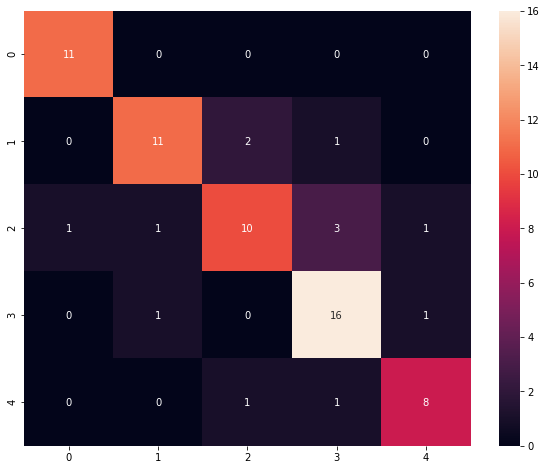

In [140]:
conf_matrix(bagg_model);

<a id='9.5.4'></a>
**Classification Report**

In [141]:
print(class_report(bagg_model))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.85      0.79      0.81        14
           2       0.77      0.62      0.69        16
           3       0.76      0.89      0.82        18
           4       0.80      0.80      0.80        10

    accuracy                           0.81        69
   macro avg       0.82      0.82      0.82        69
weighted avg       0.81      0.81      0.81        69



<a id='8.6'></a>

## Boosting 

<a id='9.6.1'></a>
**Cross Validation**

In [142]:
gb_model = GradientBoostingClassifier()
kfolds(gb_model, "Boosting")

Boosting score on cross validation: 70.86956521739131%


<a id='9.6.2'></a>
**Accuarcy of the model**

In [143]:
train(gb_model, "Boosting")

Boosting model score on Training data: 100.0%
Boosting model score on Testing data: 71.01449275362319%


<a id='9.6.3'></a>
**Confusion Matrix**

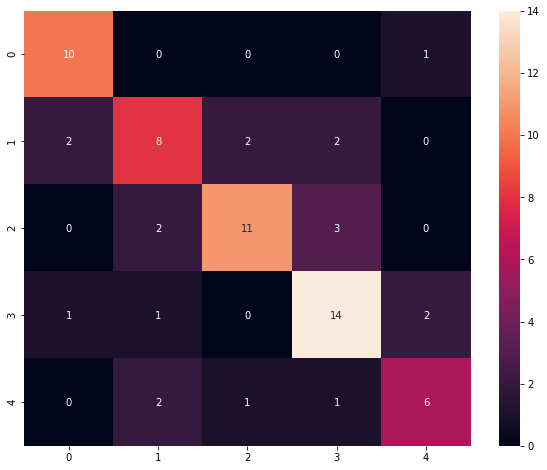

In [144]:
conf_matrix(gb_model);

<a id='9.6.4'></a>
**Classification Report**

In [145]:
print(class_report(gb_model))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.62      0.57      0.59        14
           2       0.79      0.69      0.73        16
           3       0.70      0.78      0.74        18
           4       0.67      0.60      0.63        10

    accuracy                           0.71        69
   macro avg       0.71      0.71      0.71        69
weighted avg       0.71      0.71      0.71        69



<a id='8.7'></a>
## KNN

<a id='9.7.1'></a>
**Cross Validation**

In [129]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
kfolds(knn, "KNN")

KNN score on cross validation: 62.17391304347826%


<a id='9.7.2'></a>
**Accuarcy of the model**

In [130]:
train(knn, "KNN")

KNN model score on Training data: 100.0%
KNN model score on Testing data: 68.11594202898551%


<a id='9.7.3'></a>
**Confusion Matrix**

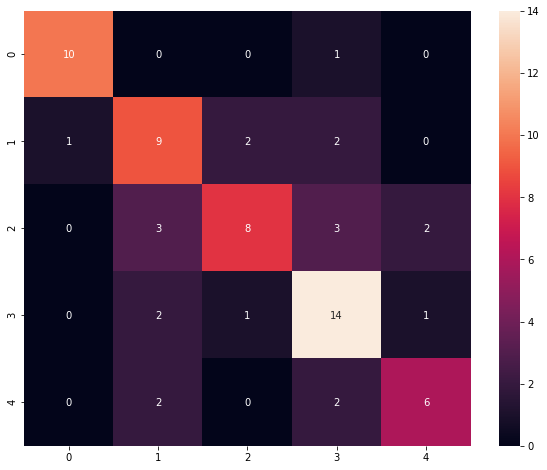

In [131]:
conf_matrix(knn);

<a id='9.7.4'></a>
**Classification Report**

In [133]:
print(class_report(knn))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.56      0.64      0.60        14
           2       0.73      0.50      0.59        16
           3       0.64      0.78      0.70        18
           4       0.67      0.60      0.63        10

    accuracy                           0.68        69
   macro avg       0.70      0.69      0.69        69
weighted avg       0.69      0.68      0.68        69



<a id='9.8'></a>
## ANN

In [225]:
X_nn = X_scale
y_nn = y

In [226]:
X_nn

array([[ 1.57752272,  1.10733636,  0.82935446, ..., -0.90962234,
         1.09738526,  1.20914643],
       [-0.80002889, -0.83526185, -1.0645002 , ...,  1.36980538,
         1.46464406, -0.76258446],
       [-0.83172958, -0.99449121, -1.18868739, ..., -0.94996619,
        -0.93273977, -0.92191624],
       ...,
       [-1.06948474, -1.13779763, -1.31287459, ..., -0.93988023,
        -0.87152997, -0.8820833 ],
       [-0.92683164, -0.96264533, -1.0645002 , ..., -1.0306539 ,
        -0.93273977, -0.92191624],
       [ 0.83255655,  0.97995287,  0.92249485, ..., -0.96005216,
         1.09738526, -0.91195801]])

In [227]:
y_nn

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [228]:
LE = LabelEncoder()
y_nn_cat = to_categorical(LE.fit_transform(y_nn))

In [229]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn_cat,test_size=0.3, random_state=40)

<a id='9.8.1'></a>
**Build and Train ANN Model**

In [130]:
def load_model(): 
    model = Sequential([
        Dense(4096, activation ='swish', input_shape = [X_nn.shape[1]]),
        Dense(2048, activation ='swish'),
        Dense(1024, activation ='swish'),
        Dense(512, activation ='swish'),
        Dense(5, activation='sigmoid'),
    ])
    model.compile(
        optimizer=  tf.keras.optimizers.Adam(learning_rate = 0.00001),
        loss='categorical_crossentropy',
        metrics='accuracy',
    )
    return model

early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')
    
ann_model = load_model()
history = ann_model.fit(  X_train_nn , y_train_nn,
                validation_data = (X_test_nn , y_test_nn),
                epochs = 1000,
                batch_size = 8,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
21/21 [==============================] - 3s 102ms/step - loss: 1.4303 - accuracy: 0.3540 - val_loss: 1.2968 - val_accuracy: 0.5652 - lr: 1.0000e-05
Epoch 2/1000
21/21 [==============================] - 2s 97ms/step - loss: 0.9375 - accuracy: 0.7888 - val_loss: 1.1521 - val_accuracy: 0.6232 - lr: 1.0000e-05
Epoch 3/1000
21/21 [==============================] - 2s 97ms/step - loss: 0.6758 - accuracy: 0.9627 - val_loss: 1.0420 - val_accuracy: 0.6812 - lr: 1.0000e-05
Epoch 4/1000
21/21 [==============================] - 2s 97ms/step - loss: 0.4825 - accuracy: 1.0000 - val_loss: 0.9772 - val_accuracy: 0.7101 - lr: 1.0000e-05
Epoch 5/1000
21/21 [==============================] - 2s 97ms/step - loss: 0.3366 - accuracy: 1.0000 - val_loss: 0.9099 - val_accuracy: 0.7391 - lr: 1.0000e-05
Epoch 6/1000
21/21 [==============================] - 2s 96ms/step - loss: 0.2322 - accuracy: 1.0000 - val_loss: 0.8658 - val_accuracy: 0.7391 - lr: 1.0000e-05
Epoch 7/1000
21/21 [===================

<a id='9.8.2'></a>
**Accuarcy of ANN**

In [140]:
ann_model.evaluate(X_test_nn, y_test_nn)

3/3 [==============================] - 0s 12ms/step - loss: 0.6650 - accuracy: 0.8116


[0.6649658679962158, 0.8115941882133484]

<a id='9.8.3'></a>
**ANN Loss Curve**

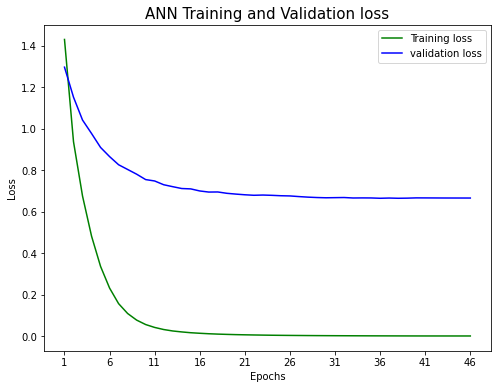

In [155]:
plt.figure(figsize=(8,6))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,47)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('ANN Training and Validation loss', {'fontsize' : '15'})
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,50,5))
plt.legend()
plt.show()

In [230]:
y_predicted = nn_model.predict(X_test_nn)

In [231]:
y_predicted

array([[1.56290878e-06, 1.25058349e-02, 7.94096410e-01, 1.75097600e-01,
        1.82986055e-02],
       [4.39587200e-10, 3.05201713e-04, 9.99693036e-01, 3.25640997e-07,
        1.47879939e-06],
       [1.03930189e-11, 3.31555015e-07, 1.45119604e-12, 9.99999642e-01,
        1.08335958e-10],
       [4.12531342e-10, 5.88232651e-05, 9.99937415e-01, 3.76085791e-06,
        6.02553507e-10],
       [2.56756376e-02, 8.95145595e-01, 2.21489905e-03, 3.63221898e-06,
        7.69602954e-02],
       [6.44238840e-09, 2.89886248e-05, 4.08304032e-07, 9.99969840e-01,
        8.91543323e-07],
       [9.52450115e-16, 2.64906976e-08, 8.81821993e-09, 1.00000000e+00,
        1.15414171e-10],
       [2.03252140e-17, 9.51024266e-14, 7.64155406e-09, 9.53375920e-11,
        1.00000000e+00],
       [2.25207046e-07, 3.53466533e-03, 2.51356349e-03, 9.84471262e-01,
        9.48017929e-03],
       [1.80836501e-08, 4.06146572e-14, 9.68927855e-11, 1.11305735e-06,
        9.99998927e-01],
       [2.31261685e-01, 7.6873

In [232]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [233]:
y_predicted_labels

[2,
 2,
 3,
 2,
 1,
 3,
 3,
 4,
 3,
 4,
 1,
 4,
 3,
 2,
 4,
 3,
 4,
 3,
 1,
 2,
 3,
 2,
 1,
 4,
 4,
 4,
 4,
 0,
 1,
 2,
 0,
 3,
 1,
 1,
 1,
 2,
 0,
 3,
 0,
 4,
 2,
 2,
 1,
 4,
 2,
 4,
 3,
 4,
 1,
 3,
 2,
 1,
 0,
 2,
 0,
 4,
 3,
 3,
 0,
 3,
 4,
 2,
 0,
 1,
 2,
 3,
 1,
 0,
 1]

In [234]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(69,)

In [235]:
y_test_nn.shape

(69, 5)

In [236]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn,test_size=0.3, random_state=40)

In [239]:
y_test_nn = np.array(y_test_nn)
y_test_nn.shape

(69,)

<a id='9.8.4'></a>
**Confusion Matrix**

In [152]:
cm = tf.math.confusion_matrix(labels=y_test_nn, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 7,  0,  0,  0,  0],
       [ 0, 11,  0,  2,  0],
       [ 0,  1, 15,  0,  0],
       [ 0,  2,  0, 14,  1],
       [ 2,  0,  0,  0, 14]])>

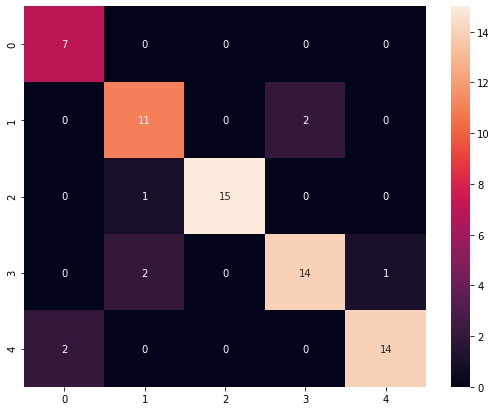

In [246]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True);

<a id='9.8.5'></a>
**Classification Report**

In [245]:
print(classification_report(y_test_nn, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.79      0.85      0.81        13
           2       1.00      0.94      0.97        16
           3       0.88      0.82      0.85        17
           4       0.93      0.88      0.90        16

    accuracy                           0.88        69
   macro avg       0.87      0.90      0.88        69
weighted avg       0.89      0.88      0.89        69

